In [49]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd

###############영준

volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set'

FilePathList =[]

for dirName, subdirList, fileList in os.walk(volume_path):
    for filename in fileList:
        if '.csv' not in filename:
            # print(filename)
            FilePathList.append(volume_path+'/'+filename)
        else:
            pd_label = pd.read_csv(volume_path+'/'+filename)


In [228]:
pd_label.head()
labels = np.array(pd_label['algorithm'])
print(labels.shape)

(5000,)


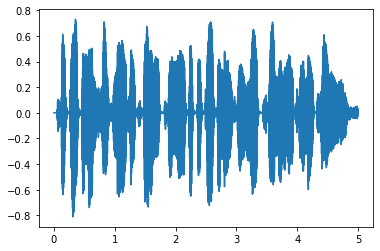

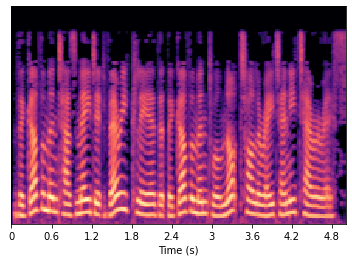

(128, 216)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.99986395e+00
 4.99990930e+00 4.99995465e+00]


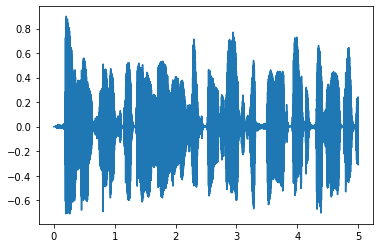

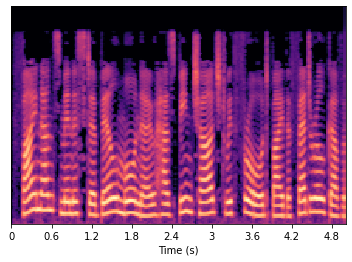

(128, 216)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.99986395e+00
 4.99990930e+00 4.99995465e+00]


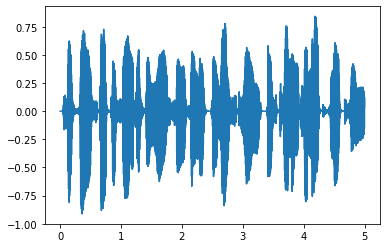

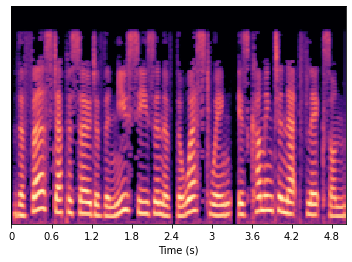

(128, 216)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.99986395e+00
 4.99990930e+00 4.99995465e+00]


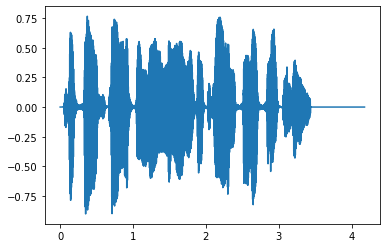

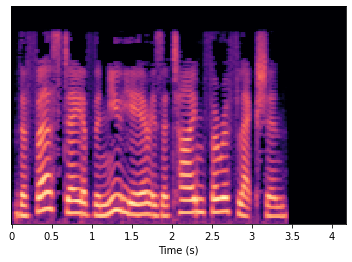

(128, 180)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.17587302e+00
 4.17591837e+00 4.17596372e+00]


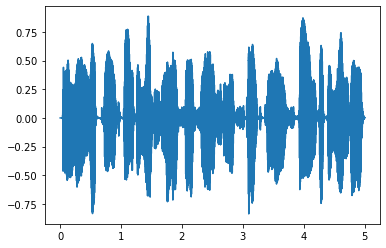

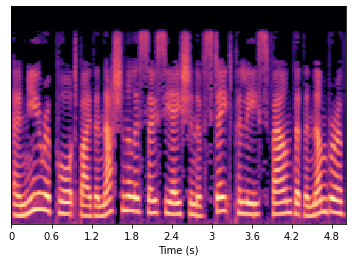

(128, 216)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.99986395e+00
 4.99990930e+00 4.99995465e+00]


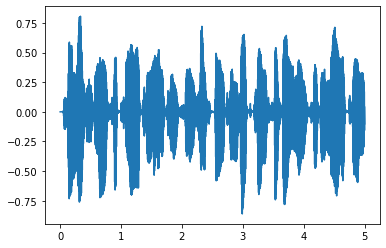

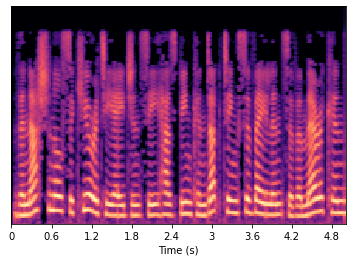

(128, 216)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.99986395e+00
 4.99990930e+00 4.99995465e+00]


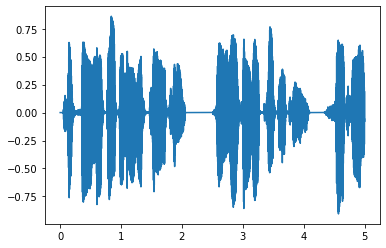

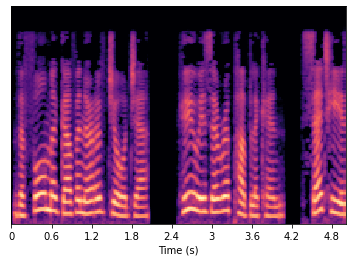

(128, 216)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.99986395e+00
 4.99990930e+00 4.99995465e+00]


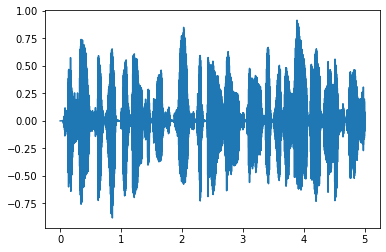

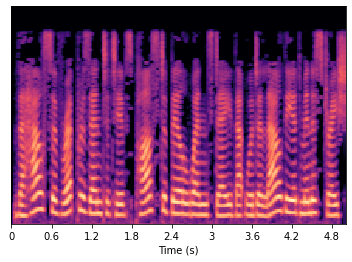

(128, 216)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.99986395e+00
 4.99990930e+00 4.99995465e+00]


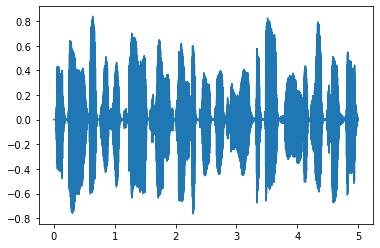

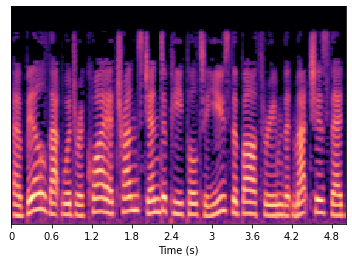

(128, 216)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.99986395e+00
 4.99990930e+00 4.99995465e+00]


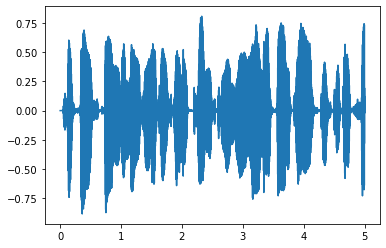

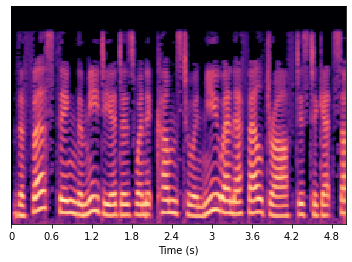

(128, 216)
[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 4.99986395e+00
 4.99990930e+00 4.99995465e+00]


In [32]:
sampling_rate = 16000
n_fft = 2048 #default



###### Sample mel

#     plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr=  duration=5)
    S = librosa.feature.melspectrogram(y=y, sr=sampling_rate, n_mels=128,
                                    fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    

    plt.plot(np.array(range(y.shape[0]))/sr,y)
    plt.show()
    librosa.display.specshow(S_dB, sr=sr,
                            fmax=8000, x_axis = 's')
    plt.show()
    #plt.specgram(y, NFFT=2048, Fs=16000, Fc=0, noverlap=128, sides='default', mode='default', scale='dB');
    # plt.axis('off');
    print(S_dB.shape)
    print( np.array(range(y.shape[0]))/sr)
   



In [211]:
for filepath in FilePathList[:10]:
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr = sampling_rate, duration = 10)

    # print(S_dB.shape)
    print( y.shape[0])
#     length_y.append(y.shape[0])

128640
98304
107136
66816
160000
160000
160000
158208
160000
135552


In [278]:
###########파일별로 시간 얼마나되는지 확인 라벨 별로 확인 1
# X_arr = np.zeros((1,128,216))

length_y = []
length_S_dB = []
X_arr = []
for i, filepath in enumerate(FilePathList[:1000]):
    # fig, ax = plt.subplots()
    
#     print(labels[i+4000])
#     if labels[i+4000] != 4:
#         break

    y, sr = librosa.load(filepath, mono=True, sr = sampling_rate)
#     if y.shape[0]==236287:
#         print(filepath)
    # print(S_dB.shape)
    # print( y.shape)
    length_y.append(y.shape[0])
    # X_arr = np.append(X_arr, S_dB,axis=0)

    # librosa.display.specshow(S_dB, sr=sr,
    #                         fmax=8000, ax=ax)

    # plt.show()

length_y = np.array(length_y)
print(np.unique(length_y))
# print(np.unique(length_S_dB))
print('############')

[ 34560  36864  37248  38016  39168  39552  39936  40704  41472  42240
  42624  43008  43392  44544  45696  46464  46848  47232  47616  48000
  49152  50304  50688  51456  51840  52224  53760  54144  54528  55296
  55680  56064  57600  59136  62208  62592  62976  63360  64128  64512
  65280  66048  66816  67200  67584  67968  68352  69120  69504  69888
  70272  70656  71040  71424  71808  72192  72576  72960  73728  74112
  74496  75264  75648  76032  76800  77184  77568  77952  78336  78720
  79104  79488  80256  81024  81408  81792  82176  82560  82944  83328
  83712  84096  84480  84864  85248  85632  86016  86400  86784  87168
  87936  88320  88704  89088  89472  89856  90240  90624  91008  91392
  91776  92160  92544  92928  93312  93696  94080  94848  95232  95616
  96000  96384  96768  97152  97536  97920  98304  98688  99072  99456
  99840 100224 100608 100992 101376 101760 102144 102528 102912 103296
 103680 104064 104832 105216 105600 105984 106368 107136 107520 107904
 10828

In [279]:
###########파일별로 시간 얼마나되는지 확인 라벨 별로 확인 2
# print(np.where(length_y == length_y[0]))
from collections import defaultdict

len_dict = defaultdict(int)
FilePathList_len= []
total_num = 0
for i in np.unique(length_y):
#     ind = np.where(length_y == length_y[0])
    ind = np.where(length_y == i)
    # print(ind[0])
    # print(ind[0].tolist())# ind = np.array(ind)
    # print(ind.tolist())
    FilePathList = np.array(FilePathList)
    # print(FilePathList[ind[0].tolist()])
    FilePathList_len.append(FilePathList[ind[0].tolist()])
#     print('%.3f' , i/16000)
    len_dict[str(i//16000)+'초~'] += len(FilePathList[ind[0].tolist()])
    total_num += len(FilePathList[ind[0].tolist()])


print('min_time : ', np.unique(length_y)[0]/16000)
for i in len_dict:
    print(i,': ',len_dict[i],'개')
    
print('max_time : ', np.unique(length_y)[-1]/16000)
print('total num : ', total_num)

min_time :  2.16
2초~ :  29 개
3초~ :  39 개
4초~ :  63 개
5초~ :  120 개
6초~ :  108 개
7초~ :  82 개
8초~ :  119 개
9초~ :  127 개
10초~ :  129 개
11초~ :  103 개
12초~ :  60 개
13초~ :  18 개
14초~ :  3 개
max_time :  14.64
total num :  1000


In [189]:
###########파일별로 시간 얼마나되는지 확인 라벨 별로 확인 3
#시간 초(소수점까지)마다 파일 개수
print(len(FilePathList_len))
print(len(np.unique(length_y)))
File_time_num =[]
for i in FilePathList_len:
    File_time_num.append(len(i))
    print(len(i))

416
416
1
1
2
1
1
2
1
1
1
1
2
3
2
1
1
1
2
1
2
1
1
1
1
1
1
3
2
2
1
2
5
1
1
3
4
3
3
1
1
1
2
2
1
1
3
2
2
2
1
2
4
1
2
1
1
1
2
2
1
4
2
2
4
1
1
1
1
2
1
4
3
2
1
3
1
3
1
4
1
4
3
3
1
2
1
2
1
1
1
3
1
1
3
1
1
2
3
1
5
3
1
1
1
1
1
1
1
6
3
1
3
4
3
2
2
3
4
1
2
3
3
2
3
1
1
6
2
4
1
6
2
2
1
1
4
3
3
1
2
4
1
1
3
2
1
9
2
4
1
1
3
1
1
1
3
4
5
4
4
1
4
1
3
2
3
3
4
3
2
2
3
4
2
3
4
3
1
4
3
4
2
4
1
2
4
3
1
1
9
2
2
1
2
3
1
4
7
3
4
4
1
4
3
1
1
2
1
5
3
1
1
3
7
6
2
2
3
5
2
2
2
2
5
4
4
3
2
2
4
2
1
5
4
4
1
1
3
2
1
5
3
4
1
4
2
3
2
5
4
3
3
8
1
7
7
3
1
2
3
5
4
2
3
2
10
2
4
5
1
1
1
2
6
3
1
4
3
3
1
3
4
8
4
5
8
1
3
2
8
5
6
4
6
2
5
2
4
3
3
1
4
3
3
1
6
1
2
2
3
1
3
5
3
6
5
3
2
1
3
4
8
2
3
3
3
1
3
5
1
1
1
3
14
4
4
3
5
6
5
2
3
6
4
1
2
5
4
1
2
3
7
1
9
5
3
1
3
3
2
7
3
3
7
5
3
1
3
2
9
3
1
1
11
5
2
1
3
5
3
2
3
3
4
7
5
5
3
4
4
11
1
2
5
5
8
1
1
2
1
10
2
4
8
1
2
2
1
7
5
1
1
4
4
2
3
3807


In [158]:
# X_arr = np.zeros((1,128,216))

length_y = []
length_S_dB = []
X_arr = []
for filepath in FilePathList:
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, duration=5)
    S = librosa.feature.melspectrogram(y=y, sr=sampling_rate, n_mels=128,
                                    fmax=8000)

    S_dB = librosa.power_to_db(S, ref=np.max)
    # print(S_dB.shape)
    # print( y.shape)
    length_y.append(y.shape[0])
    length_S_dB.append(S_dB.shape[1])
    X_arr.append(S_dB)
    # X_arr = np.append(X_arr, S_dB,axis=0)

    # librosa.display.specshow(S_dB, sr=sr,
    #                         fmax=8000, ax=ax)

    # plt.show()

length_y = np.array(length_y)
length_S_dB = np.array(length_S_dB)
print(np.unique(length_y))
print(np.unique(length_S_dB))
print('############')

[ 29768  33075  33737  34398  34817  35060  35329  35721  36353  36383
  37889  38367  38401  38657  38913  39029  39170  39681  39690  39937
  40450  40705  40961  41217  41675  41729  41985  42241  42336  42998
  43009  43522  43659  43777  44289  44321  44546  44801  45057  45313
  45570  45644  45825  46081  46305  46594  46850  46967  47105  47617
  47628  47874  48129  48290  48385  48898  48951  49613  49665  49922
  50689  50804  50936  50946  51201  51333  51457  51713  51970  52225
  52259  52391  52481  52737  52994  53250  53505  53761  53979  54017
  54243  54274  54508  54529  54785  54905  55037  55298  55553  55566
  55809  56096  56228  56322  56833  56889  57089  57154  57346  57551
  57601  57857  58113  58212  58370  58625  58742  58874  58881  59271
  59535  59800  59905  60161  60197  60858  60929  61185  61388  61441
  61520  61698  62181  62209  62465  62843  62975  62977  63489  63504
  63746  64001  64034  64166  64257  64513  64563  64770  64827  65025
  6509

In [34]:
print(length_y[:50])

[110250 110250 110250  92081 110250 110250 110250 110250 110250 110250
 110250 110250 110250  92610 110250 110250 104782 110250  50804 110250
  91023 110250 110250 110250 110250 110250 110250 110250 110250 110250
 110250 110250 110250 110250 110250 110250 110250 110250 110250 110250
 110250 110250 110250 110250 110250 110250 110250 110250 110250 110250]


In [35]:
max(length_S_dB)

216

In [36]:
# print(np.where(length_y == length_y[0]))
FilePathList_len= []
for i in np.unique(length_y):
#     ind = np.where(length_y == length_y[0])
    ind = np.where(length_y == i)
    
    # print(ind[0])
    # print(ind[0].tolist())# ind = np.array(ind)
    # print(ind.tolist())
    FilePathList = np.array(FilePathList)
    # print(FilePathList[ind[0].tolist()])
    FilePathList_len.append(FilePathList[ind[0].tolist()])


In [37]:
 len(FilePathList_len)

416

In [38]:
# for j in range(len(FilePathList_len)):
#     for filepath in FilePathList_len[j][:1]:
#     #     plt.subplots()
#         y, sr = librosa.load(filepath, mono=True, duration=5)
#         S = librosa.feature.melspectrogram(y=y, sr=sampling_rate, n_mels=128,
#                                         fmax=8000)
#         S_dB = librosa.power_to_db(S, ref=np.max)
#         plt.plot(np.array(range(y.shape[0]))/sr,y)
#         plt.show()
#         librosa.display.specshow(S_dB, sr=sr,
#                                 fmax=8000, x_axis = 's')
#         plt.show()
#         #plt.specgram(y, NFFT=2048, Fs=16000, Fc=0, noverlap=128, sides='default', mode='default', scale='dB');
#         # plt.axis('off');
#         print(S_dB.shape)
#     #     print( np.array(range(y.shape[0]))/sr)

In [39]:
# for j in range(len(FilePathList_len)):
#     for filepath in FilePathList_len[j][:1]:
#     #     plt.subplots()
#         y, sr = librosa.load(filepath, mono=True, duration=5)
#         S = librosa.feature.melspectrogram(y=y, sr=sampling_rate, n_mels=128,
#                                         fmax=8000)
#         S_dB = librosa.power_to_db(S, ref=np.max)
        
        
#         plt.plot(np.array(range(y.shape[0]))/sr,y)
#         plt.show()
#         librosa.display.specshow(S_dB, sr=sr,
#                                 fmax=8000, x_axis = 's')
#         plt.show()
#         #plt.specgram(y, NFFT=2048, Fs=16000, Fc=0, noverlap=128, sides='default', mode='default', scale='dB');
#         # plt.axis('off');
#         print(S_dB.shape)
#     #     print( np.array(range(y.shape[0]))/sr)

In [40]:
# def get_numpy_from_nonfixed_2d_array(aa, fixed_length, padding_value=0):
#     rows = []
#     for a in aa:
#         rows.append(np.pad(a, (0, fixed_length), 'constant', constant_values=padding_value)[:fixed_length])
#     return np.concatenate(rows, axis=0).reshape(-1, fixed_length)

In [176]:
x_arr_copy = X_arr
x_arr_cut = X_arr


In [161]:
#cut X,y

mini = 200
for i in range(len(x_arr_cut)):
    print(x_arr_cut[i].shape)
    if x_arr_cut[i].shape[1]<mini:
        mini = x_arr_cut[i].shape[1]

print(mini)

(128, 216)
(128, 216)
(128, 216)
(128, 180)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 181)
(128, 216)
(128, 216)
(128, 205)
(128, 216)
(128, 100)
(128, 216)
(128, 178)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 151)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 193)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 94)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)


(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 112)
(128, 216)
(128, 147)
(128, 216)
(128, 89)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 165)
(128, 184)
(128, 109)
(128, 216)
(128, 106)
(128, 178)
(128, 216)
(128, 216)
(128, 179)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 89)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 158)
(128, 113)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 178)
(128, 171)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 187)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 149)
(128, 199)
(128, 193)
(128, 216)
(128, 216)
(128, 153)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 103)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 153)
(128, 216)
(128, 216)
(128, 131)
(128, 98)
(128, 216)
(128, 107)
(128, 216)
(128, 216)
(128, 155)
(128, 198)
(128, 138)
(128, 216)
(128, 216)
(128, 216)
(1

(128, 216)
(128, 174)
(128, 75)
(128, 216)
(128, 171)
(128, 216)
(128, 216)
(128, 146)
(128, 193)
(128, 216)
(128, 202)
(128, 216)
(128, 130)
(128, 180)
(128, 216)
(128, 153)
(128, 197)
(128, 145)
(128, 216)
(128, 216)
(128, 187)
(128, 216)
(128, 216)
(128, 192)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 175)
(128, 188)
(128, 216)
(128, 123)
(128, 216)
(128, 216)
(128, 134)
(128, 216)
(128, 126)
(128, 216)
(128, 78)
(128, 216)
(128, 180)
(128, 166)
(128, 216)
(128, 189)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 106)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 170)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 194)
(128, 216)
(128, 216)
(128, 198)
(128, 216)
(128, 130)
(128, 185)
(128, 192)
(128, 117)
(128, 216)
(128, 211)
(128, 216)
(128, 216)
(128, 137)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 69)
(128, 211)
(128, 216)
(128, 216)
(128, 171)
(1

In [177]:
for i in range(len(x_arr_cut)):
    print(x_arr_cut[i][:,:59].shape)
    x_arr_cut[i]=x_arr_cut[i][:,:59]
    x_arr_cut[i] = np.expand_dims(x_arr_cut[i],axis=0)
#     print(x_arr_cut[i].shape)

x_arr_cut = np.concatenate(x_arr_cut,axis = 0)
print(x_arr_cut.shape)

(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)


(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)


(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)
(128, 59)


In [42]:
len(x_arr_copy)
print(x_arr_copy[0])
print(x_arr_copy[0].shape[1])

[[-80.       -54.825203 -44.117958 ... -52.553886 -48.109627 -48.81601 ]
 [-80.       -56.636982 -39.922134 ... -45.720894 -49.893158 -55.712982]
 [-80.       -55.15332  -37.24244  ... -53.816444 -61.019943 -58.230976]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]
216


In [66]:
pad_x_arr = []
for arr in x_arr_copy:
#     print(arr.shape)
#     arr = arr.tolist()
    arr = np.pad(arr,((0,0),(0,216-arr.shape[1])),'constant',constant_values=0)
    print(arr.shape)
    arr = np.expand_dims(arr,axis=0)
    pad_x_arr.append(arr)

pad_x_arr = np.concatenate(pad_x_arr,axis = 0)
print(pad_x_arr.shape)

(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)

(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)

(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)

(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)

(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(128, 216)
(5000, 128, 216)


In [178]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(pad_x_arr, label, test_size=0.2, stratify = label, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x_arr_cut, label, test_size=0.2, stratify = label, random_state=42)



In [179]:
from tensorflow.keras.utils import to_categorical



print(X_train.shape)
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print(X_train_.shape[1:])

# one hot encode outputs
y_train_ =to_categorical(y_train) 
y_test_ = to_categorical(y_test) 
print(y_test.shape)
print(y_test_.shape)
print(y_test_)
print(y_train_.shape)

(4000, 128, 59)
(128, 59, 1)
(1000,)
(1000, 5)
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
(4000, 5)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 126, 57, 32)       320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 63, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 61, 26, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 30, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 11, 64)        36928     
                                                                 
 flatten_16 (Flatten)        (None, 19712)           

KeyError: 'acc'

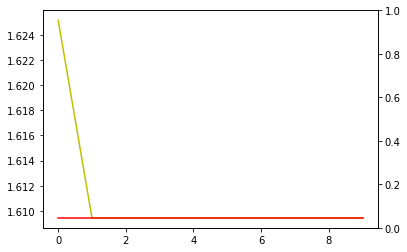

In [180]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train_.shape[1:])))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Activation('softmax'))
# model.add(layers.Dense(5, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train_, y_train_,
	 batch_size = 100,
         epochs = 10,
         verbose = 1,
         validation_data = (X_test_, y_test_))


%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')
acc_ax.plot(hist.history['acc'],'b',label='train acc')
acc_ax.plot(hist.history['val_acc'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [101]:
# from tensorflow.keras.applications import ResNet50
# model = ResNet50(include_top=True, weights=None, input_shape=(128, 216, 1), pooling=max, classes=3)
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# model.fit(X_train_,y_train_, batch_size=64, epochs=10, validation_data=(X_test_, y_test_))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\GJ\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\GJ\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\GJ\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\GJ\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\GJ\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\GJ\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\GJ\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\GJ\anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\GJ\anaconda3\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5) and (None, 3) are incompatible


In [ ]:


#
#
# ##### 형섭 :::  wav 파일 스펙토그램 png 파일로 변환 후 저장하기
#
# volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set'
#
# FilePathList =[]
#
# for dirName, subdirList, fileList in os.walk(volume_path):
#     for filename in fileList:
#         if '.csv' not in filename:
#             print(filename)
#             FilePathList.append(os.path.join(dirName , filename))
#
#
#
# sampling_rate = 16000
# n_fft = 2048 #default
#
#
#
# ###### Sample mel
# for filename in os.listdir(volume_path):
#     audioname = volume_path+'/'+filename
#     fig, ax = plt.subplots()
#     y, sr = librosa.load(audioname, mono=True, duration=5)
#     S = librosa.feature.melspectrogram(y=y, sr=sampling_rate, n_mels=128,
#                                     fmax=8000)
#     S_dB = librosa.power_to_db(S, ref=np.max)
#     librosa.display.specshow(S_dB, sr=sr,
#                             fmax=8000, ax=ax)
#     #plt.specgram(y, NFFT=2048, Fs=16000, Fc=0, noverlap=128, sides='default', mode='default', scale='dB');
#     plt.axis('off');
#     break
#
#
# X_arr = np.zeros((1,128,216))
#
#
# for filename in os.listdir(volume_path):
#     audioname = volume_path+'/'+filename
#     y, sr = librosa.load(audioname, mono=True, duration=5)
#     S = librosa.feature.melspectrogram(y=y, sr=sampling_rate, n_mels=128,
#                                     fmax=8000)
#     S_dB = librosa.power_to_db(S, ref=np.max)
#
#     X_arr = np.append(X_arr, S_dB)
#
# X_arr = X_arr[1:]
#     # plt.savefig(f'/content/drive/MyDrive/Dataset/mel_spectogram_500/{filename[:-3].replace(".", "")}.png')
#     # plt.clf()